In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the data
data_set =pd.read_csv('/content/sample_data/Fraud.csv')
# Shape the data
data_set.shape

(6362620, 11)

In [ ]:
# Get first 1000 rows of the data
data_set.head(1000)

# Get last 1000 rows of the data
data_set.head(1000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,PAYMENT,2167.26,C732597634,13669.0,11501.74,M832432849,0.0,0.0,0,0
996,1,PAYMENT,9738.95,C2031927175,289748.0,280009.05,M176041373,0.0,0.0,0,0
997,1,PAYMENT,3396.25,C1967617997,18524.0,15127.75,M726843606,0.0,0.0,0,0
998,1,PAYMENT,6780.78,C925803196,52640.0,45859.22,M1288135425,0.0,0.0,0,0


In [ ]:
# Check for null values
data_set.isnull().values.any()

# collect information about the Data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Count the occurrences of each unique value in the 'isFraud' column
counts = data_set['isFraud'].value_counts()

# Extract the counts for legitimate and fraudulent transactions
legit = counts.get(0, 0)  # Get the count for '0' (legitimate transactions), default to 0 if not found
fraud = counts.get(1, 0)  # Get the count for '1' (fraudulent transactions), default to 0 if not found

# Calculate the percentage of legitimate and fraudulent transactions
total_transactions = legit + fraud
legit_percent = (legit / total_transactions) * 100
fraud_percent = (fraud / total_transactions) * 100

# Print the results
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [ ]:
# Drop rows with missing values in the 'nameDest' column
data_set.dropna(subset=['nameDest'], inplace=True)

# Merchants
x = data_set[data_set['nameDest'].str.contains('M')]
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

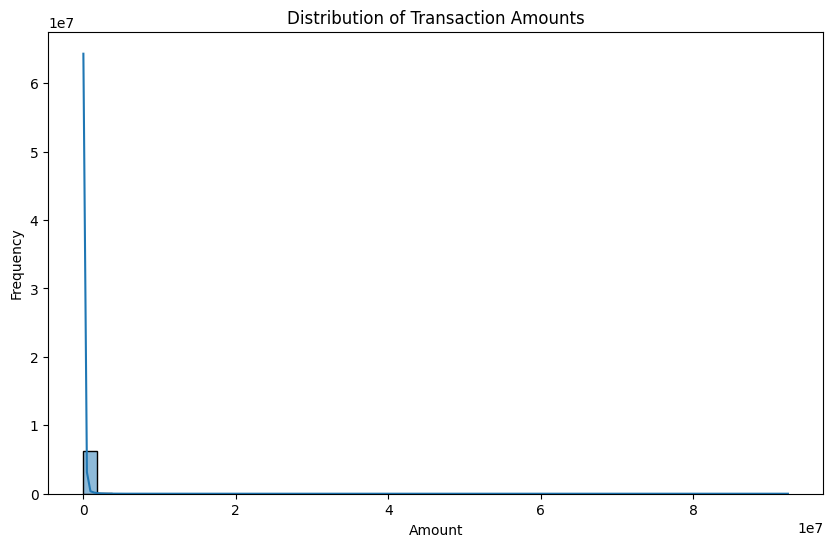

In [ ]:
# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data_set['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

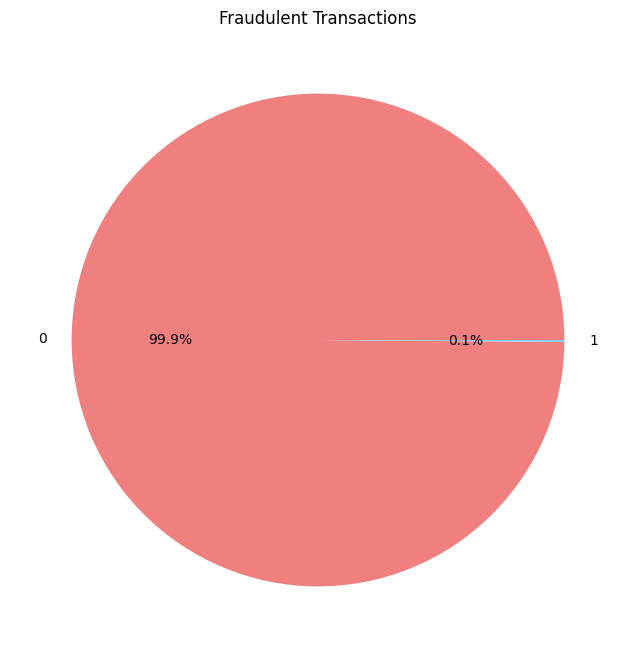

In [ ]:
# Pie chart of fraudulent transactions
plt.figure(figsize=(8, 8))
data_set['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Fraudulent Transactions')
plt.ylabel('')
plt.show()

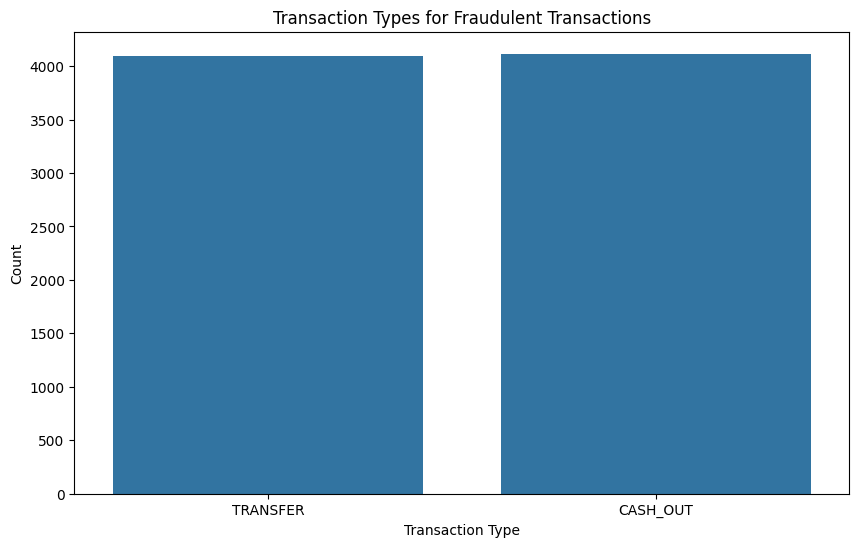

In [ ]:
# Count plot of transaction types for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(data=data_set[data_set['isFraud'] == 1], x='type')
plt.title('Transaction Types for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

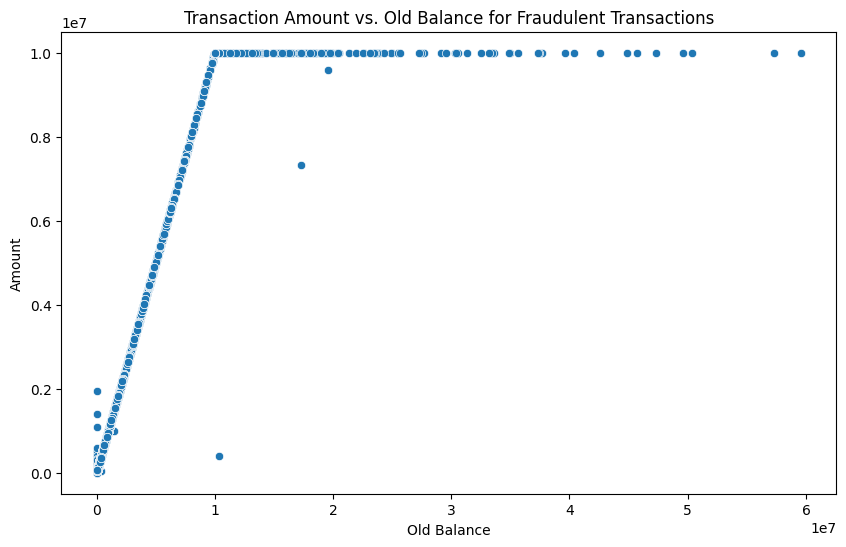

In [ ]:
# Scatter plot of transaction amount vs. old balance for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_set[data_set['isFraud'] == 1], x='oldbalanceOrg', y='amount')
plt.title('Transaction Amount vs. Old Balance for Fraudulent Transactions')
plt.xlabel('Old Balance')
plt.ylabel('Amount')
plt.show()

<ipython-input-18-a2b9b32870b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_set.corr()


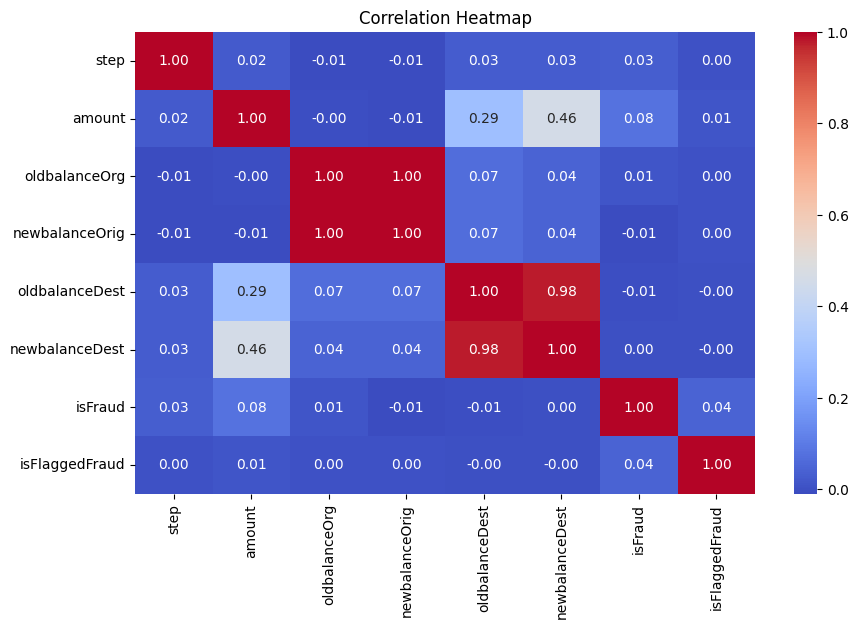

In [ ]:
# Compute the correlation matrix
corr = data_set.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

Here, it is seen that newbalanceDest and oldbalanceDest are highly correlated

In [ ]:
new_data_set = data_set.copy()
new_data_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# finding attributes that are of data type 'object'
objList = [col for col in new_data_set.columns if new_data_set[col].dtype == 'object']
print(objList)

['type', 'nameOrig', 'nameDest']


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_data_set[feat] = le.fit_transform(new_data_set[feat].astype(str))

print (new_data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [ ]:
new_data_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data_set):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data_set.columns
    vif["VIF"] = [variance_inflation_factor(data_set.values, i) for i in range(data_set.shape[1])]

    return(vif)

calc_vif(new_data_set)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [ ]:
new_data_set['Actual_amount_orig'] = new_data_set.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_data_set['Actual_amount_dest'] = new_data_set.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_data_set['TransactionPath'] = new_data_set.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_data_set = new_data_set.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_data_set)

In [ ]:
# Calculate the correlation matrix
corr = new_data_set.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'new_data_set' is not defined

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_data_set["NormalizedAmount"] = scaler.fit_transform(new_data_set["amount"].values.reshape(-1, 1))
new_data_set.drop(["amount"], inplace= True, axis= 1)

Y = new_data_set["isFraud"]
X = new_data_set.drop(["isFraud"], axis= 1)

NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



NameError: name 'X' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'new_data_set' contains the preprocessed data with features and target variable
X = new_data_set.drop(columns=['isFraud'])  # Features
y = new_data_set['isFraud']  # Target variable

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains the features and y contains the target variable (isFraud)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy Score: 0.9975980784627703

Confusion Matrix:
 [[11201    15]
 [   12    13]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11216
         1.0       0.46      0.52      0.49        25

    accuracy                           1.00     11241
   macro avg       0.73      0.76      0.74     11241
weighted avg       1.00      1.00      1.00     11241

